In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
data = pd.read_excel("C:/Users/ManiShankar/Documents/LetsUpgrade/AI_ML/Materials/Datasets/Linear Regression.xlsx")

In [3]:
data.head(1)

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.0,1.0


In [4]:
data.tail(1)

,price,sqft_living,bedrooms,bathrooms,floors
21612,325000,1020,2,0.75,2.0


- We use pairplot to check linearity of variables

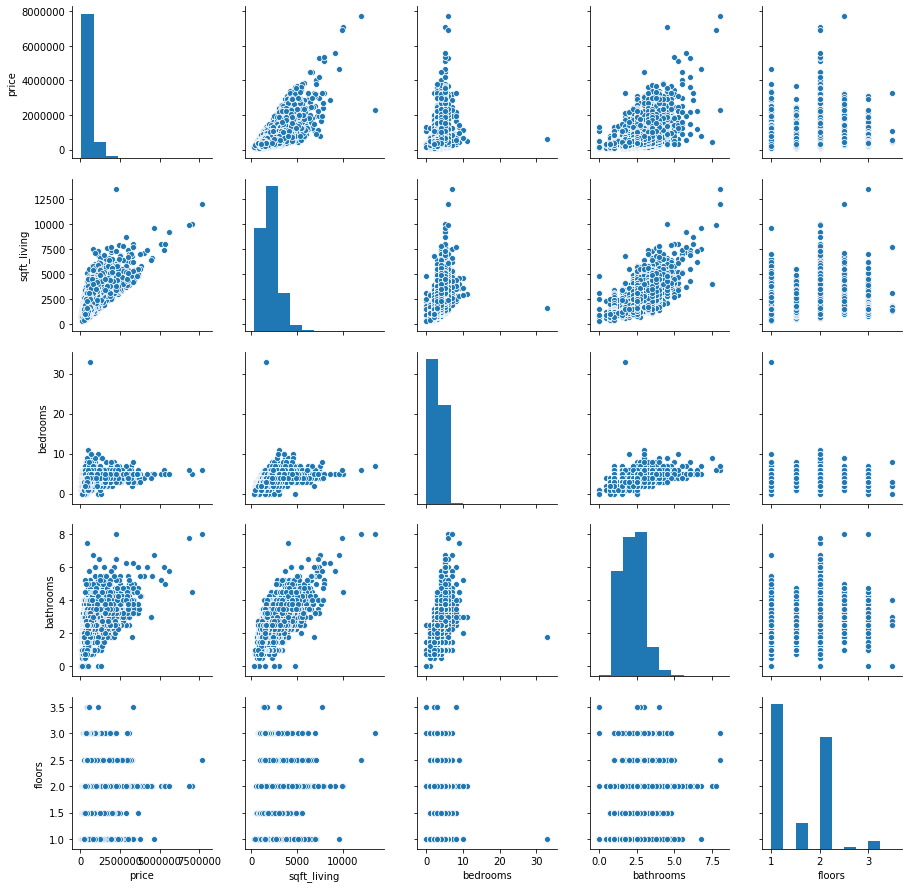

In [5]:
sns.pairplot(data)

In [6]:
data.corr()

,price,sqft_living,bedrooms,bathrooms,floors
price,1.000000,0.702035,0.308350,0.525138,0.256794
sqft_living,0.702035,1.000000,0.576671,0.754665,0.353949
bedrooms,0.308350,0.576671,1.000000,0.515884,0.175429
bathrooms,0.525138,0.754665,0.515884,1.000000,0.500653
floors,0.256794,0.353949,0.175429,0.500653,1.000000


- Fom above scatter diagram and correlation value we can conclude that regression can be used for all possible pairs

# 1. price vs sqrt_living

In [7]:
data.head(1)

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.0,1.0


In [8]:
# EDA
data1 = data[['price','sqft_living']]

In [9]:
data1.head(1)

,price,sqft_living
0,221900,1180


In [10]:
# null values
data1.isna().sum()

price          0
sqft_living    0
dtype: int64

In [11]:
len(data1)

21613

In [12]:
# duplicate values
data1 = data1.drop_duplicates()

In [13]:
len(data1)

19601

- Both input and output are dependent variables
- Here no null values and we have removed duplicated records so continue with regression

In [14]:
x = data1.sqft_living

In [15]:
x.head(1)

0    1180
Name: sqft_living, dtype: int64

In [16]:
y = data1.price

In [17]:
y.head(1)

0    221900
Name: price, dtype: int64

In [18]:
print(len(x))
print(len(y))

19601
19601


In [19]:
x1 = sm.add_constant(x)

C:\Users\ManiShankar\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [20]:
# Here i'm using ols(Ordinary Least Square)
lm = sm.OLS(y,x1) # o/p,i/p

In [21]:
model = lm.fit()

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                 1.896e+04
Date:                Thu, 06 Aug 2020   Prob (F-statistic):               0.00
Time:                        11:14:04   Log-Likelihood:            -2.7298e+05
No. Observations:               19601   AIC:                         5.460e+05
Df Residuals:                   19599   BIC:                         5.460e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.626e+04   4753.094     -9.732      0.000   -5.56e+04   -3.69e+04
sqft_living   283.1395      2.056    137.702      0.000     279.109     287.170
==============================================================================
Omnibus:                    13076.782   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           433829.939
Skew:                           2.740   Prob(JB):                         0.00
Kurtosis:                      25.387   Cond. No.                     5.69e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
2.217e+05

221700.0

In [24]:
1.184e+05

118400.0

1. Here r2 value is 0.836 means 83.6 % independent variable(sqft_living) is affecting dependent varaible(price).
2. since p < 0.05 there is a significant impact on price beacuse of sqft_living.
3. 221700.0 is the amount that need to be paid irrespective of number of square_feets you buy.
4. 118400.0 is the value that need to be paid for each square_feet.

# 2. price vs bedrooms

In [25]:
data2 = data[['price','bedrooms']]

In [26]:
data2.head(1)

,price,bedrooms
0,221900,3


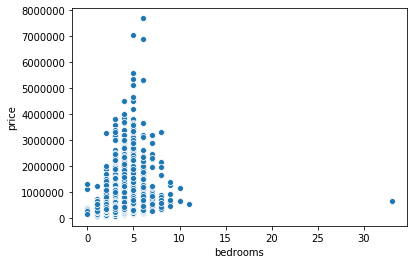

In [27]:
sns.scatterplot(x = data2.bedrooms, y = data2.price)

- there isn't much linearity but we can try regression as both dependent and independent variables are continuos

In [28]:
# checking for null values
data2.isna().sum()

price       0
bedrooms    0
dtype: int64

In [29]:
len(data2)

21613

In [30]:
# removing duplicate records
data2 = data2.drop_duplicates()
len(data2)

6815

- Some rows were dropped

In [31]:
y = data2.price
x = data2.bedrooms

In [32]:
print(y.head(1))
print(x.head(1))

0    221900
Name: price, dtype: int64
0    3
Name: bedrooms, dtype: int64


In [33]:
len(x)
len(y)

6815

In [34]:
x1 = sm.add_constant(x)

In [35]:
lm2 = sm.OLS(y,x1)

In [36]:
model2 = lm2.fit()

In [37]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     572.6
Date:                Thu, 06 Aug 2020   Prob (F-statistic):          1.42e-121
Time:                        11:14:06   Log-Likelihood:                -98977.
No. Observations:                6815   AIC:                         1.980e+05
Df Residuals:                    6813   BIC:                         1.980e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.217e+05   1.84e+04     12.054      0.000    1.86e+05    2.58e+05
bedrooms    1.184e+05   4945.965     23.929      0.000    1.09e+05    1.28e+05
==============================================================================
Omnibus:                     5300.599   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           177948.650
Skew:                           3.445   Prob(JB):                         0.00
Kurtosis:                      27.067   Cond. No.                         12.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
2.217e+05

221700.0

In [39]:
1.184e+05

118400.0

1. Here r2 value is 0.632 means 63.2 % independent variable(bedrooms) is affecting dependent varaible(price).
2. since p < 0.05 there is a significant impact on price beacuse of bedrooms.
3. 221700.0 is the amount that need to be paid irrespective of house with number of bedrooms you buy.
4. 118400.0 is the value that need to be paid for each bedroom

In [40]:
data.columns

Index(['price', 'sqft_living', 'bedrooms', 'bathrooms', 'floors'], dtype='object')

# 3. price vs bathrooms

In [41]:
data3 = data[['price','bathrooms']]

In [42]:
data3.head(1)

,price,bathrooms
0,221900,1.0


In [43]:
# checking for null values
data3.isna().sum()

price        0
bathrooms    0
dtype: int64

In [44]:
len(data3)

21613

In [45]:
#checking and removing duplicated rows
data3 = data3.drop_duplicates()
len(data3)

9048

- So no dupliacated records

In [46]:
x = data3.bathrooms
y = data3.price

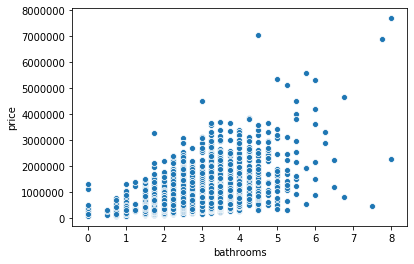

In [47]:
sns.scatterplot(x = data3.bathrooms, y = data3.price)

- there isn't much linearity but we can try regression as both dependent and independent variables are continuos

In [48]:
print(len(x))
print(len(y))

9048
9048


In [49]:
x1 = sm.add_constant(x)

In [50]:
lm3 = sm.OLS(y,x1)

In [51]:
model3 = lm3.fit()

In [52]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     3583.
Date:                Thu, 06 Aug 2020   Prob (F-statistic):               0.00
Time:                        11:14:07   Log-Likelihood:            -1.2971e+05
No. Observations:                9048   AIC:                         2.594e+05
Df Residuals:                    9046   BIC:                         2.594e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.162e+04   1.21e+04     -3.440      0.001   -6.53e+04   -1.79e+04
bathrooms   2.958e+05   4942.185     59.861      0.000    2.86e+05    3.06e+05
==============================================================================
Omnibus:                     6038.548   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           151341.542
Skew:                           2.832   Prob(JB):                         0.00
Kurtosis:                      22.218   Cond. No.                         7.94
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
2.958e+05

295800.0

1. Here r2 value is 0.739 means 73.9 % independent variable(bathrooms) is affecting dependent varaible(price).
2. since p < 0.05 there is a significant impact on price beacuse of bathrooms.
3. 295800.0 is the value that need to be paid for each bathrooms

# 4. price vs floors

In [54]:
data4 = data[['price','floors']]

In [55]:
data4.head(1)

,price,floors
0,221900,1.0


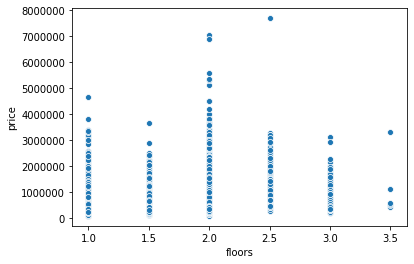

In [56]:
sns.scatterplot(x = data4.floors, y = data4.price)

- there isn't much linearity but we can try regression as both dependent and independent variables are continuos

In [57]:
# checking for null values
data3.isna().sum()

price        0
bathrooms    0
dtype: int64

In [58]:
print(len(data3))

9048


In [59]:
# checking for dupliacted records
data3 = data3.drop_duplicates()
len(data3)

9048

In [60]:
x = data4.floors
y = data4.price

In [61]:
print(len(x))
print(len(y))

21613
21613


In [62]:
x1 = sm.add_constant(x)

In [63]:
lm4 = sm.OLS(y,x1)

In [64]:
model4 = lm4.fit()

In [65]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     1526.
Date:                Thu, 06 Aug 2020   Prob (F-statistic):          1.58e-322
Time:                        11:14:08   Log-Likelihood:            -3.0687e+05
No. Observations:               21613   AIC:                         6.137e+05
Df Residuals:                   21611   BIC:                         6.138e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.792e+05   7101.851     39.313      0.000    2.65e+05    2.93e+05
floors      1.746e+05   4469.727     39.060      0.000    1.66e+05    1.83e+05
==============================================================================
Omnibus:                    19377.136   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1260093.162
Skew:                           4.077   Prob(JB):                         0.00
Kurtosis:                      39.507   Cond. No.                         6.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
1.746e+05

174600.0

1. Here r2 value is 0.066 means 6.6 % independent variable(floors) is affecting dependent varaible(price).
2. since p < 0.05 there is a significant impact on price beacuse of floors.
3. 174600.0 is the value that need to be paid for each floor